In [1]:
import pandas as pd
from cemba_data.plot.clustering import categorical_scatter
import matplotlib.pyplot as plt
import numpy as np

import pathlib

## ED7a Marmoset

In [2]:
methyl_renamed = {
    'Exc_Deep_SYT6_ADCY8':'Exc_Deep_SYT6_ADCY8_QKI', 
    'Exc_Deep_SYT6_QKI':'Exc_Deep_SYT6_ADCY8_QKI',
    'Exc_NP_TSHZ2_CD44':'Exc_NP_TSHZ2_CD44_PTCHD4', 
    'Exc_NP_TSHZ2_PTCHD4':'Exc_NP_TSHZ2_CD44_PTCHD4',
    'NonN_ODC': 'NonN_Mix1',
    'NonN_Mix': 'NonN_Mix2',
    'Exc_Deep_OLFML2B_MITF':'Exc_Deep_OLFML2B_SLC4A4'
}

In [3]:
cell_type_meta = pd.read_csv('PATH-TO-ANALYSIS/Marmoset/integration-with-rna/integration_results/cytosplore.marmoset.tsv',sep='\t')
DNAm_meta = cell_type_meta[['DNAm_cluster_name','DNAm_cluster_label','DNAm_cluster_color']].drop_duplicates()
RNA_meta = cell_type_meta[['cluster_label','cluster_color']].drop_duplicates()

snmc_clust_path = 'PATH-TO-ANALYSIS/Marmoset/Marmoset-M1.snmC-seq.AnalysisResult.csv.gz'
df = pd.read_csv(snmc_clust_path)
# df.dropna(inplace=True)
df =df[df['SubCluster']!='Outlier']

df['SubCluster'] = df['SubCluster'].apply(lambda x: methyl_renamed[x] if x in methyl_renamed else x)
df = pd.merge(df, DNAm_meta, how='left', left_on='SubCluster', right_on='DNAm_cluster_name')


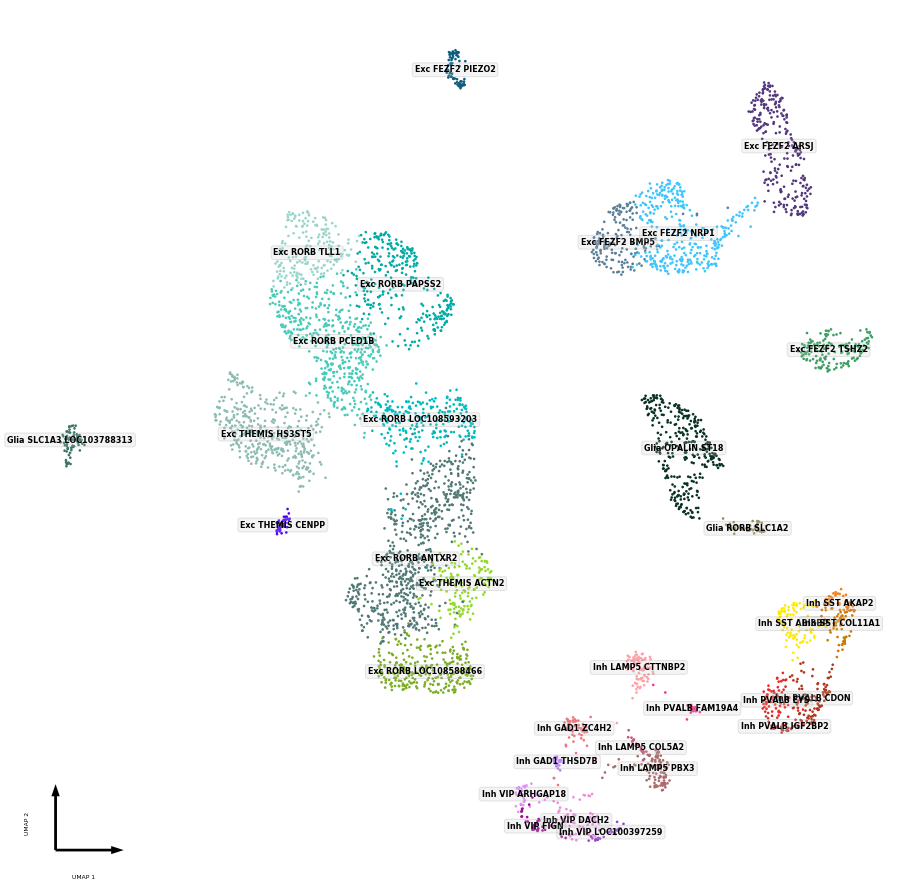

In [4]:
color_dict = { x['DNAm_cluster_label']:x['DNAm_cluster_color'] for _,x in DNAm_meta.iterrows()}
df.rename(columns={'l1_umap_0':'umap_0','l1_umap_1':'umap_1'}, inplace=True)

plt.figure(figsize=(16,16))
categorical_scatter(df, plt.gca(), coord_base='umap', hue='DNAm_cluster_label', 
                    text_anno='DNAm_cluster_label', palette=color_dict, text_anno_kws={'fontsize':8})
# plt.title('Human DNAm Clusters', fontsize=20, fontweight='bold')
plt.show()

## ED7b Mouse

In [5]:
methyl_renamed = {
    'L4-IT-Rorb_Rorb-Ryr3':'L4-IT-Rorb_Rorb-Tenm2-Ryr3',
    'L4-IT-Rorb_Rorb-Cpne4':'L4-IT-Rorb_Rorb-Tenm2-Ryr3',
}

In [6]:
cell_type_meta = pd.read_csv('PATH-TO-ANALYSIS/Mouse/integration-with-rna/integration_results/cytosplore.mouse.tsv',sep='\t')
DNAm_meta = cell_type_meta[['DNAm_cluster_name','DNAm_cluster_label','DNAm_cluster_color']].drop_duplicates()
RNA_meta = cell_type_meta[['cluster_label','cluster_color']].drop_duplicates()

snmc_clust_path = 'PATH-TO-ANALYSIS/Mouse/MOp.snmC-seq.AnalysisResult.csv.gz'
df = pd.read_csv(snmc_clust_path)
# df.dropna(inplace=True)
df =df[df['SubCluster']!='Outlier']

df['SubCluster'] = df['SubCluster'].apply(lambda x: methyl_renamed[x] if x in methyl_renamed else x)
df = pd.merge(df, DNAm_meta, how='left', left_on='SubCluster', right_on='DNAm_cluster_name')


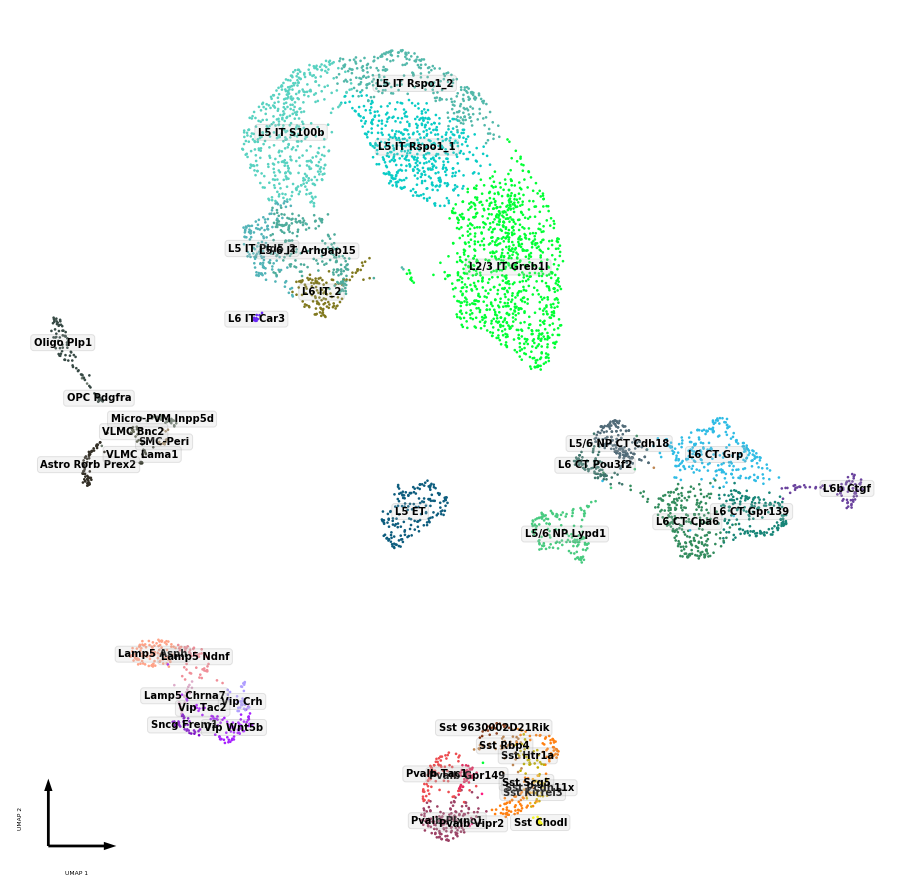

In [7]:
color_dict = { x['DNAm_cluster_label']:x['DNAm_cluster_color'] for _,x in DNAm_meta.iterrows()}
df.rename(columns={'l1_umap_0':'umap_0','l1_umap_1':'umap_1'}, inplace=True)

plt.figure(figsize=(16,16))
categorical_scatter(df, plt.gca(), coord_base='umap', hue='DNAm_cluster_label', 
                    text_anno='DNAm_cluster_label', palette=color_dict, text_anno_kws={'fontsize':10})
# plt.title('Human DNAm Clusters', fontsize=20, fontweight='bold')
plt.show()